In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df =pd.read_csv("2025-12-01_17-40-57-756.csv")
df

,CH1,CH2,CH4,time,Ts
0,0.04,-0.07,-0.06,0.000000e+00,2.000000e-08
1,-0.04,-0.08,-0.03,2.000000e-08,NaN
2,0.16,-0.03,-0.01,4.000000e-08,NaN
3,0.04,-0.05,-0.05,6.000000e-08,NaN
4,0.00,-0.06,-0.03,8.000000e-08,NaN
...,...,...,...,...,...
9995,12.24,-0.05,1.24,1.999000e-04,NaN
9996,12.20,-0.04,1.18,1.999200e-04,NaN
9997,12.40,-0.08,1.20,1.999400e-04,NaN
9998,12.28,-0.11,1.21,1.999600e-04,NaN


In [28]:
R=2.15
C=1e-6
RC = R*C

In [48]:

def first_order_lpf(u, Ts, RC, y0=0.0):
    """
    u  : input signal (numpy array)
    Ts : sampling time
    RC : time constant
    y0 : initial output
    """
    alpha = Ts / (RC + Ts)
    y = np.zeros_like(u)
    y[0] = y0

    for k in range(1, len(u)):
        new  = y[k-1] + alpha * (u[k] - y[k-1])
        if u[k] > y[k-1]:
            y[k]= new
        else :
            y[k]= y[k-1]

    return y

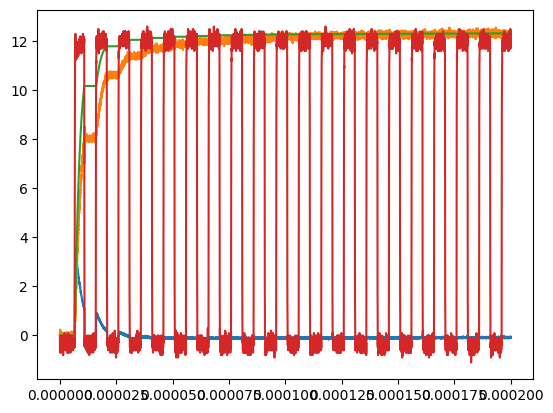

In [49]:
vdda= df.CH1.values
Id= df.CH2.values
vgs= df.CH4.values*10
Ts = df.Ts.iloc[0]
time = np.arange(0,Ts*len(Id), Ts)
vddat =  first_order_lpf(u= vgs, Ts=Ts, RC=RC, y0=0.0)
plt.plot(time, Id) 
plt.plot(time, vdda)
plt.plot(time, vddat)
plt.plot(time, vgs)

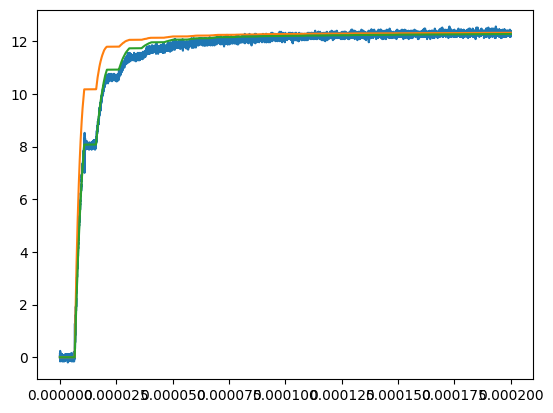

In [60]:
vddat =  first_order_lpf(u= vgs, Ts=Ts, RC=RC, y0=0.0)
vddat2 =  first_order_lpf(u= vgs, Ts=Ts, RC=RC*1.7, y0=0.0)

plt.plot(time, vdda)
plt.plot(time, vddat)
plt.plot(time, vddat2)

In [70]:
vdda[:50].mean()

np.float64(-0.004000000000000001)

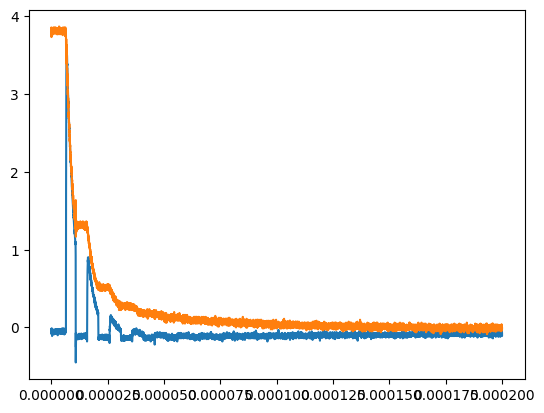

In [69]:
dv = vdda[-50:].mean() -vdda
i = dv/(1.5*R)
plt.plot(time, Id) 
plt.plot(time, i) 

In [71]:

df =pd.read_csv("2025-12-01_17-53-28-404.csv")
df

,CH1,CH2,CH4,time,Ts
0,10.801562,-0.319063,1.190000,0.000000e+00,4.000000e-09
1,11.000000,-0.279375,1.160000,4.000000e-09,NaN
2,10.800000,-0.160312,1.190078,8.000000e-09,NaN
3,11.000000,-0.235313,1.179844,1.200000e-08,NaN
4,10.600000,-0.279687,1.230078,1.600000e-08,NaN
...,...,...,...,...,...
9995,11.001563,-0.160000,1.190078,3.998000e-05,NaN
9996,11.396875,-0.363125,1.179922,3.998400e-05,NaN
9997,11.400000,-0.322188,1.180156,3.998800e-05,NaN
9998,10.801562,-0.201250,1.219844,3.999200e-05,NaN


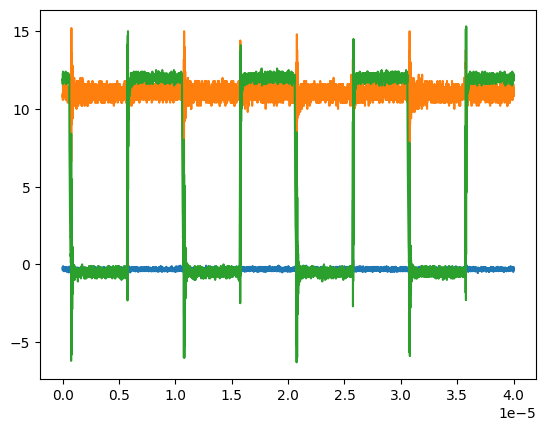

In [73]:
vdda= df.CH1.values
Id= df.CH2.values
vgs= df.CH4.values*10
Ts = df.Ts.iloc[0]
time = np.arange(0,Ts*len(Id), Ts)

plt.plot(time, Id) 
plt.plot(time, vdda)

plt.plot(time, vgs)

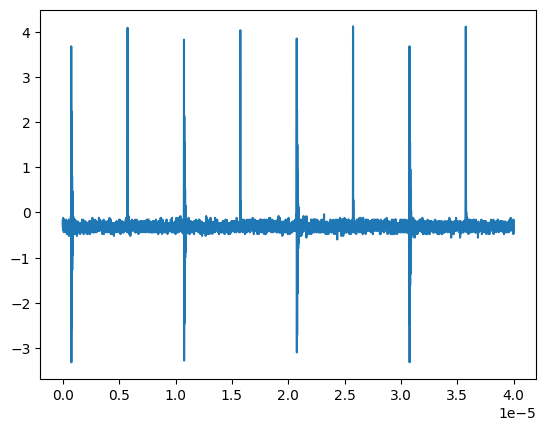

In [74]:
plt.plot(time, Id) 

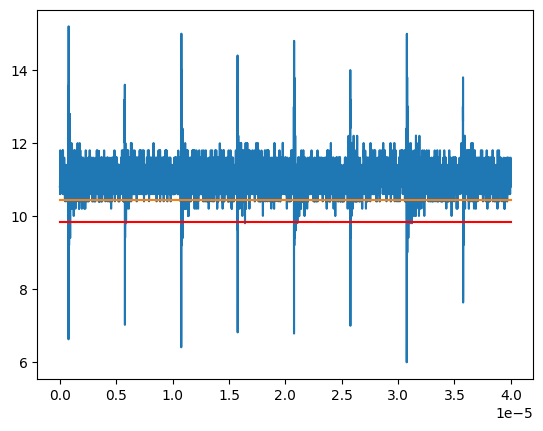

In [90]:
plt.plot(time, vdda)
v0= vdda.mean()
dv0=0.6
plt.plot([0, time.max()],[v0-dv0,v0-dv0])

deltaV= 0.6

plt.plot([0, time.max()],[v0-dv0-deltaV,v0-dv0-deltaV], c= "r")